# Data Visualization and Presentation

### Titanic Dataset Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Setting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🚢 TITANIC DATASET: DATA VISUALIZATION AND PRESENTATION")
print("="*60)
print("A comprehensive analysis of passenger survival patterns")
print("="*60)


🚢 TITANIC DATASET: DATA VISUALIZATION AND PRESENTATION
A comprehensive analysis of passenger survival patterns


## DATA LOADING AND INITIAL EXPLORATION

In [ ]:
# Load the Titanic dataset
# Note: You can download from https://www.kaggle.com/c/titanic/data or use seaborn's built-in dataset
try:
    # Try loading from file first
    df = pd.read_csv(
        "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
    ).rename(
        columns={
            col:col.lower() for col in df.columns
        }
    )
    print("✅ Dataset loaded from local file")
except:
    # Fallback to seaborn's built-in dataset
    df = sns.load_dataset("titanic")
    print("✅ Dataset loaded from seaborn")

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📈 Total Passengers: {len(df)}")

# Display basic information about the dataset
print("\n" + "=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

print("\n🔍 First 5 rows:")
display(df.head())

print("\n📋 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
display(df.describe())

print("\n🔢 Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame(
    {"Missing Count": missing_data, "Percentage": missing_percent}
).sort_values("Missing Count", ascending=False)
display(missing_df[missing_df["Missing Count"] > 0])

✅ Dataset loaded from seaborn

📊 Dataset Shape: (891, 15)
📈 Total Passengers: 891

DATASET OVERVIEW

🔍 First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

📊 Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



🔢 Missing Values:


,Missing Count,Percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


### DATA PREPROCESSING AND CLEANING

In [24]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Create a copy for processing
df_clean = df.copy()

# Handle missing values
print("\n🔧 Handling Missing Values:")

# Age: Fill with median age by passenger class and gender
df_clean['age'] = df_clean.groupby(['pclass', 'sex'])['age'].transform(
    lambda x: x.fillna(x.median())
)

# Embarked: Fill with mode (most common port)
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])
df_clean['embark_town'] = df_clean['embark_town'].fillna(df_clean['embark_town'].mode()[0])

# Deck: Extract from cabin and fill missing with 'Unknown'
df_clean['deck'] = df_clean['cabin'].str[0] if 'cabin' in df_clean.columns else 'U'
df_clean['deck'] = df_clean['deck'].fillna('U')

display(df_clean.isna().sum())
print("All null values handle via imputation")


DATA PREPROCESSING

🔧 Handling Missing Values:


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

All null values handle via imputation


In [14]:
# Create new features for better analysis
print("\n🆕 Creating New Features:")

# Age groups
df_clean['age_group'] = pd.cut(df_clean['age'], 
                              bins=[0, 12, 18, 35, 60, 100], 
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Family size
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1

# Family size categories
df_clean['family_category'] = pd.cut(df_clean['family_size'],
                                   bins=[0, 1, 4, 11],
                                   labels=['Alone', 'Small Family', 'Large Family'])

# Fare per person (to account for family tickets)
df_clean['fare_per_person'] = df_clean['fare'] / df_clean['family_size']

# Title extraction from name
if 'name' in df_clean.columns:
    df_clean['title'] = df_clean['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    # Group rare titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Officer', 'Rev': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
        'Mlle': 'Miss', 'Countess': 'Mrs', 'Ms': 'Mrs', 'Lady': 'Mrs',
        'Jonkheer': 'Officer', 'Don': 'Mr', 'Dona': 'Mrs', 'Mme': 'Mrs',
        'Capt': 'Officer', 'Sir': 'Mr'
    }
    df_clean['title'] = df_clean['title'].map(title_mapping).fillna('Other')

print("✅ Data preprocessing completed!")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")


🆕 Creating New Features:
✅ Data preprocessing completed!
📊 Cleaned dataset shape: (891, 19)


In [17]:
df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,family_size,family_category,fare_per_person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,U,Southampton,no,False,Young Adult,2,Small Family,3.62500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,U,Cherbourg,yes,False,Adult,2,Small Family,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True,Young Adult,1,Alone,7.92500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,U,Southampton,yes,False,Young Adult,2,Small Family,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,U,Southampton,no,True,Young Adult,1,Alone,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,U,Southampton,no,True,Young Adult,1,Alone,13.00000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,U,Southampton,yes,True,Young Adult,1,Alone,30.00000
888,0,3,female,21.5,1,2,23.4500,S,Third,woman,False,U,Southampton,no,False,Young Adult,4,Small Family,5.86250
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,U,Cherbourg,yes,True,Young Adult,1,Alone,30.00000



EXPLORATORY DATA ANALYSIS

📊 SURVIVAL OVERVIEW
------------------------------
Overall Survival Rate: 38.38%
Survivors: 342
Non-survivors: 549


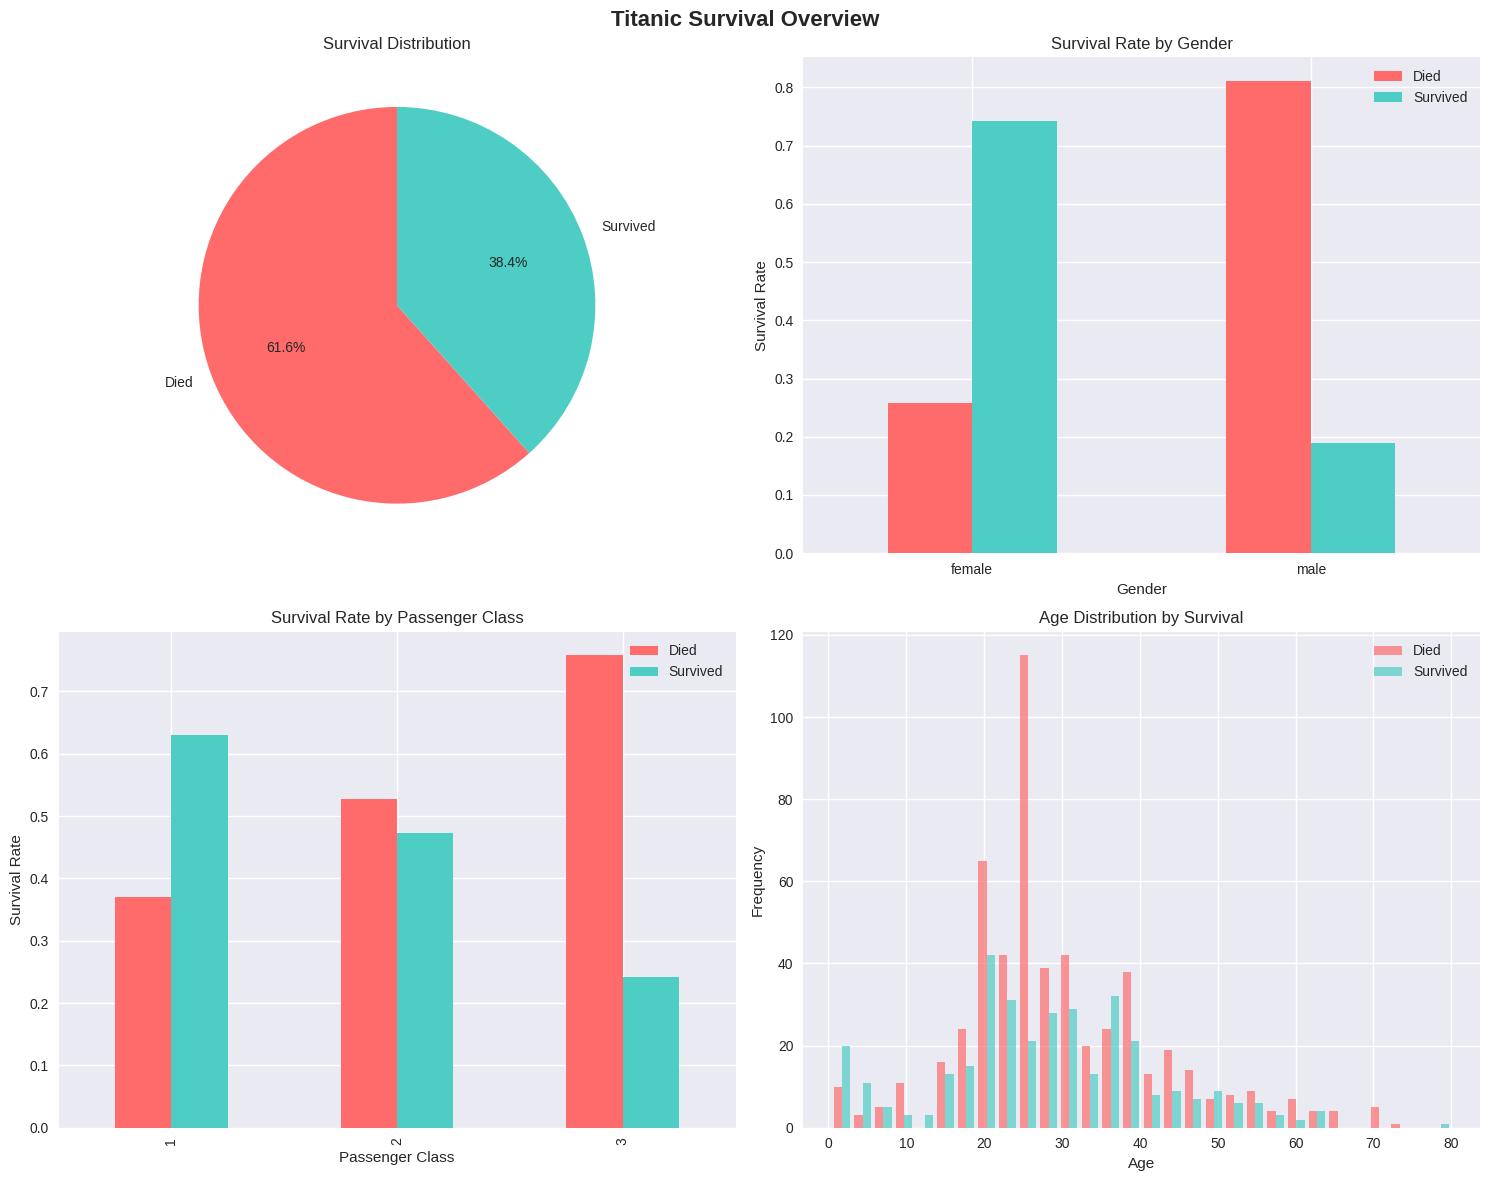


👥 DEMOGRAPHIC ANALYSIS
------------------------------


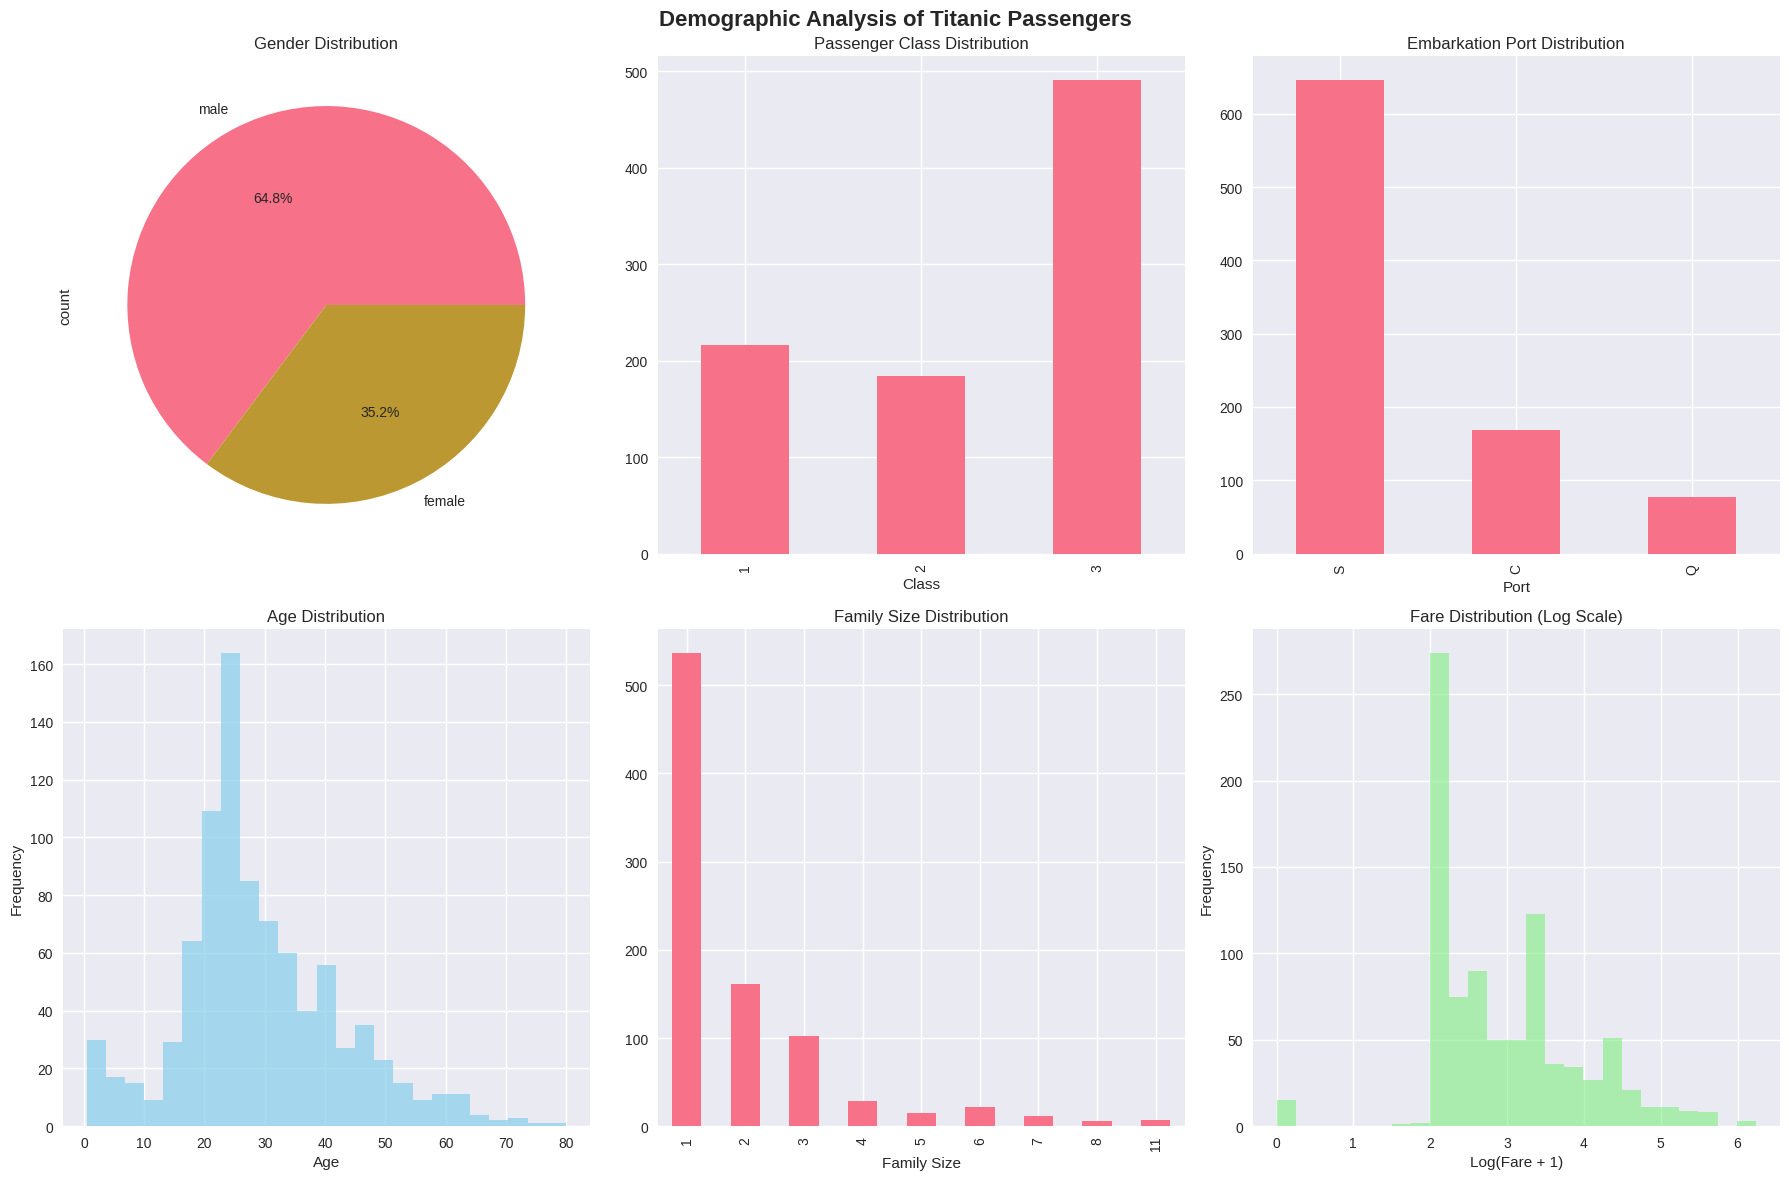


🔗 CORRELATION ANALYSIS
------------------------------


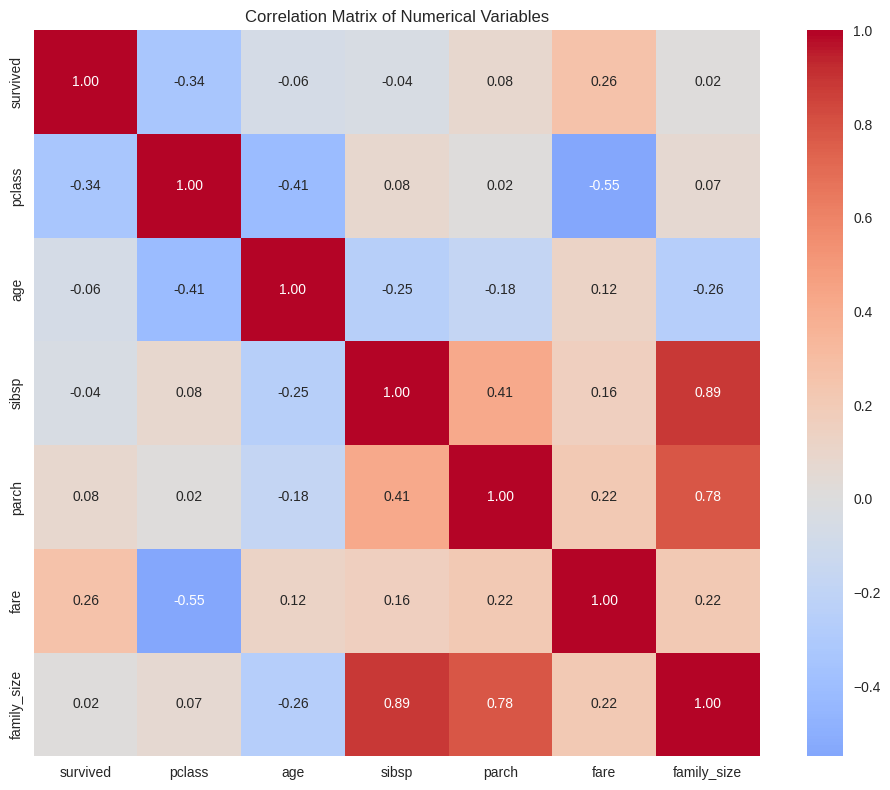

In [5]:
# ==============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Set up the plotting environment
fig_size = (15, 10)
plt.rcParams['figure.figsize'] = fig_size

# 3.1 Survival Overview
print("\n📊 SURVIVAL OVERVIEW")
print("-" * 30)

survival_counts = df_clean['survived'].value_counts()
survival_rate = df_clean['survived'].mean()

print(f"Overall Survival Rate: {survival_rate:.2%}")
print(f"Survivors: {survival_counts[1]}")
print(f"Non-survivors: {survival_counts[0]}")

# Create survival overview visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Titanic Survival Overview', fontsize=16, fontweight='bold')

# Survival count
axes[0,0].pie(survival_counts.values, labels=['Died', 'Survived'], 
              autopct='%1.1f%%', startangle=90, colors=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Survival Distribution')

# Survival by gender
survival_by_gender = pd.crosstab(df_clean['sex'], df_clean['survived'], normalize='index')
survival_by_gender.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Survival Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# Survival by class
survival_by_class = pd.crosstab(df_clean['pclass'], df_clean['survived'], normalize='index')
survival_by_class.plot(kind='bar', ax=axes[1,0], color=['#ff6b6b', '#4ecdc4'])
axes[1,0].set_title('Survival Rate by Passenger Class')
axes[1,0].set_xlabel('Passenger Class')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].legend(['Died', 'Survived'])

# Age distribution by survival
axes[1,1].hist([df_clean[df_clean['survived']==0]['age'].dropna(), 
                df_clean[df_clean['survived']==1]['age'].dropna()], 
               bins=30, alpha=0.7, label=['Died', 'Survived'], color=['#ff6b6b', '#4ecdc4'])
axes[1,1].set_title('Age Distribution by Survival')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 3.2 Demographic Analysis
print("\n👥 DEMOGRAPHIC ANALYSIS")
print("-" * 30)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Demographic Analysis of Titanic Passengers', fontsize=16, fontweight='bold')

# Gender distribution
df_clean['sex'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Gender Distribution')

# Class distribution
df_clean['pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Passenger Class Distribution')
axes[0,1].set_xlabel('Class')

# Embarked distribution
df_clean['embarked'].value_counts().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Embarkation Port Distribution')
axes[0,2].set_xlabel('Port')

# Age distribution
axes[1,0].hist(df_clean['age'].dropna(), bins=25, alpha=0.7, color='skyblue')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Family size distribution
df_clean['family_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Family Size Distribution')
axes[1,1].set_xlabel('Family Size')

# Fare distribution (log scale due to skewness)
axes[1,2].hist(np.log1p(df_clean['fare'].dropna()), bins=25, alpha=0.7, color='lightgreen')
axes[1,2].set_title('Fare Distribution (Log Scale)')
axes[1,2].set_xlabel('Log(Fare + 1)')
axes[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3.3 Correlation Analysis
print("\n🔗 CORRELATION ANALYSIS")
print("-" * 30)

# Select numerical columns for correlation
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']
correlation_matrix = df_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


DETAILED SURVIVAL ANALYSIS

🎯 SURVIVAL BY MULTIPLE FACTORS
----------------------------------------


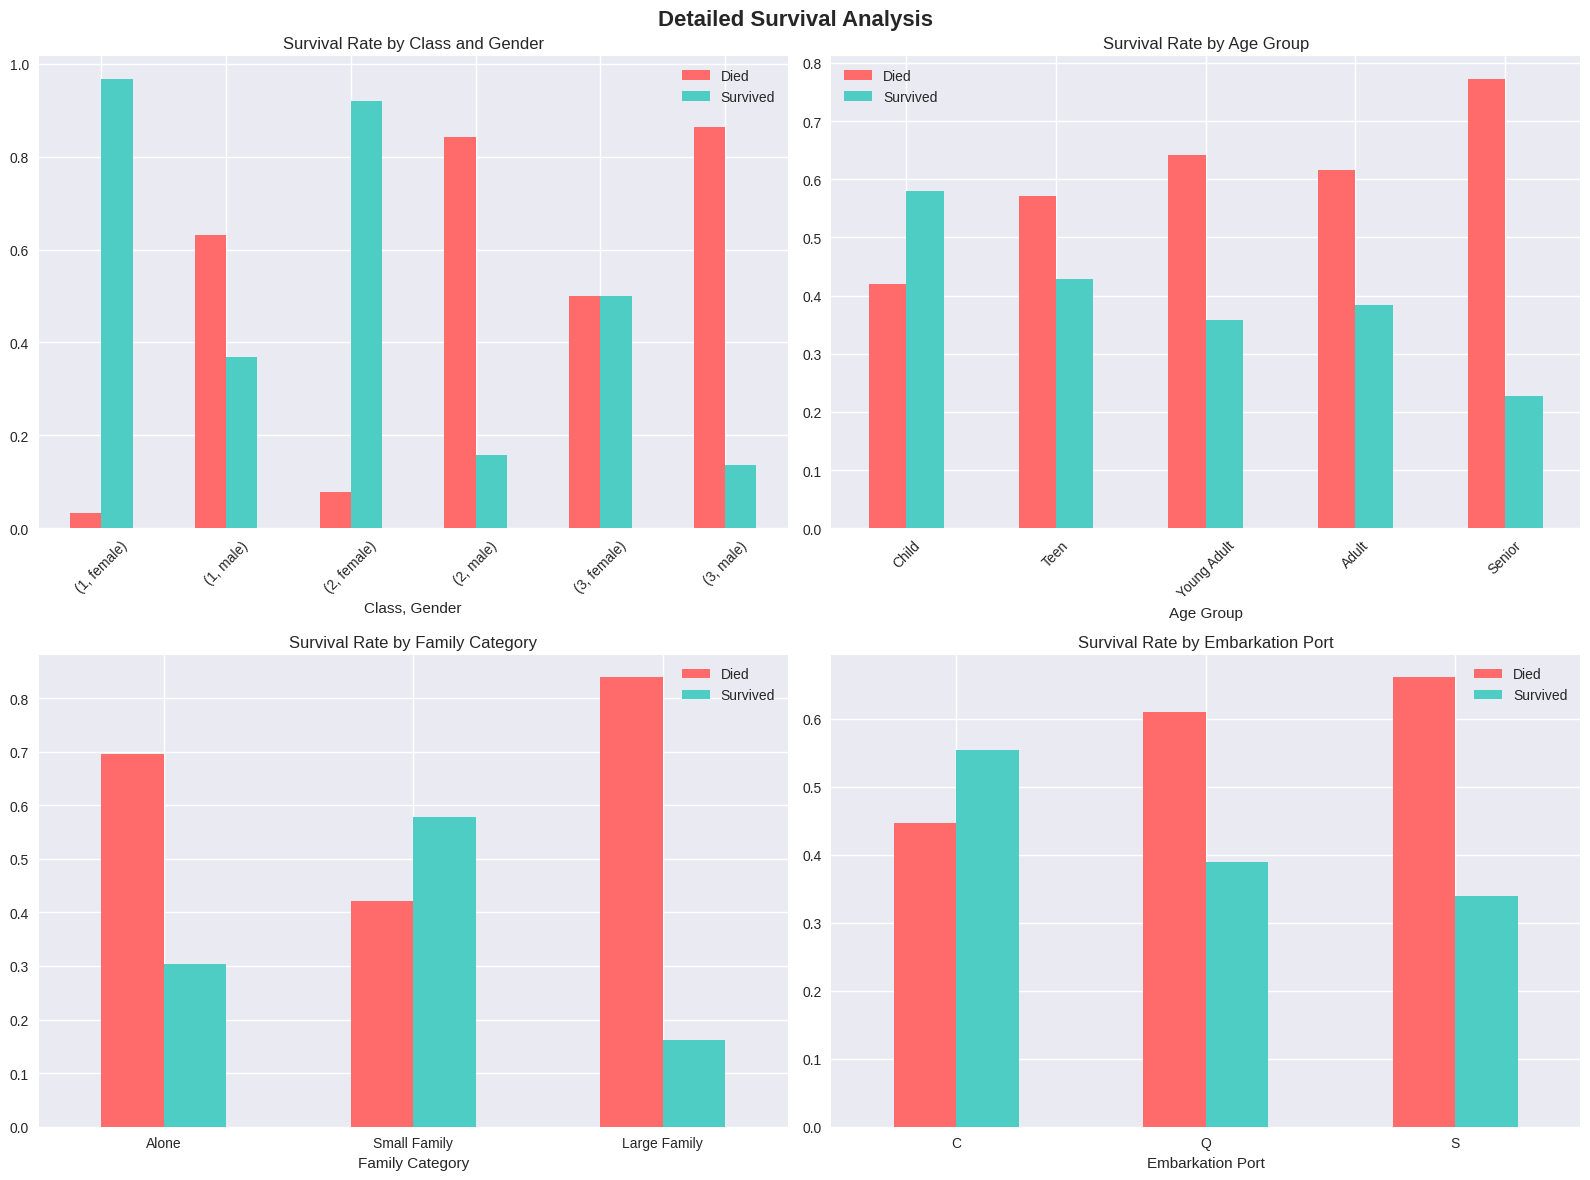


📈 ADVANCED VISUALIZATIONS
-----------------------------------


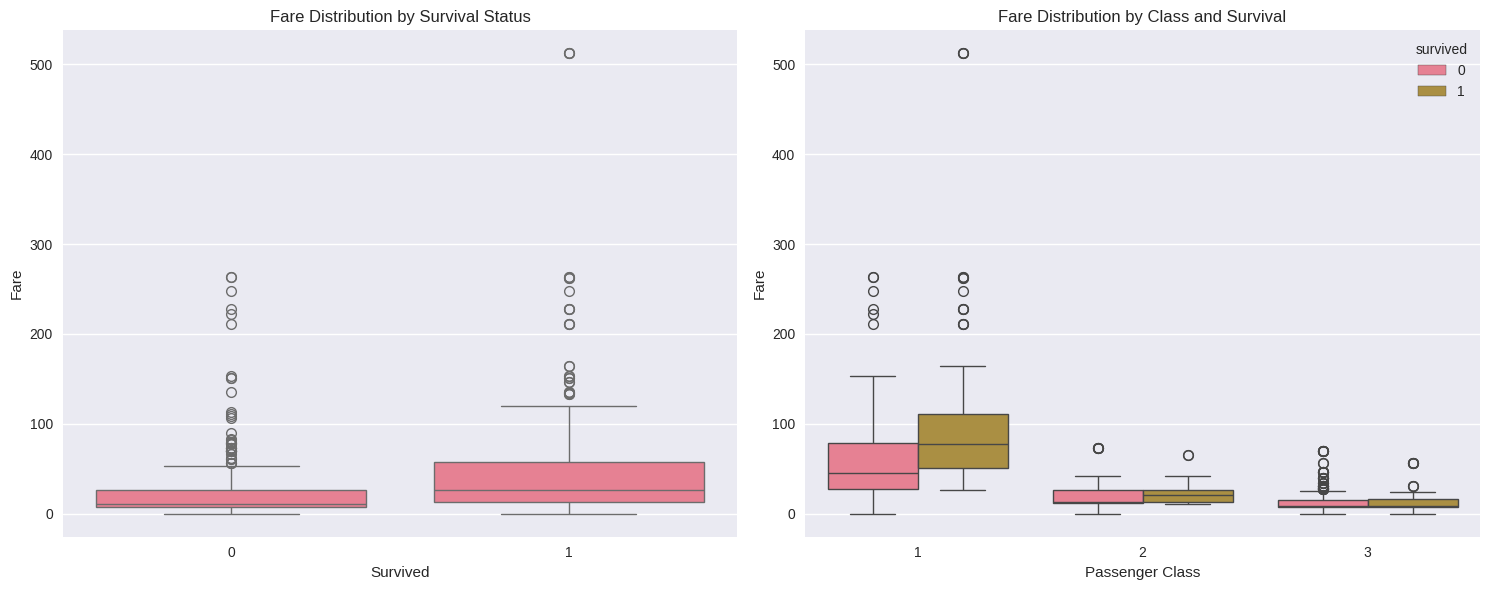

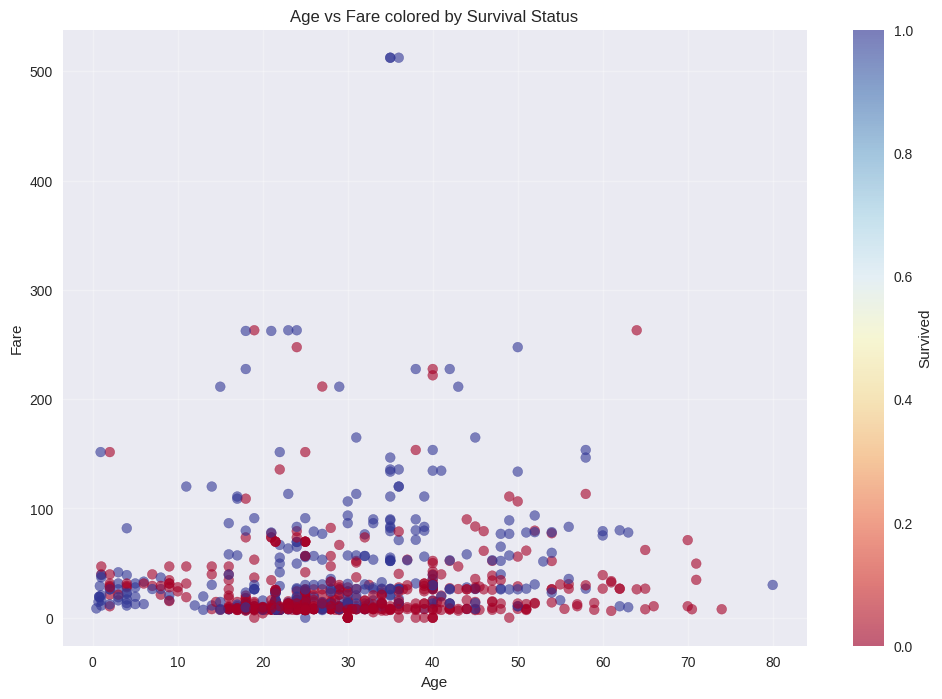

In [6]:
# ==============================================================================
# SECTION 4: DETAILED SURVIVAL ANALYSIS
# ==============================================================================

print("\n" + "="*50)
print("DETAILED SURVIVAL ANALYSIS")
print("="*50)

# 4.1 Survival by Multiple Factors
print("\n🎯 SURVIVAL BY MULTIPLE FACTORS")
print("-" * 40)

# Create comprehensive survival analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detailed Survival Analysis', fontsize=16, fontweight='bold')

# Survival by class and gender
survival_class_gender = pd.crosstab([df_clean['pclass'], df_clean['sex']], 
                                   df_clean['survived'], normalize='index')
survival_class_gender.plot(kind='bar', ax=axes[0,0], color=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Survival Rate by Class and Gender')
axes[0,0].set_xlabel('Class, Gender')
axes[0,0].legend(['Died', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=45)

# Survival by age group
survival_age = pd.crosstab(df_clean['age_group'], df_clean['survived'], normalize='index')
survival_age.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Survival Rate by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].legend(['Died', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=45)

# Survival by family size
survival_family = pd.crosstab(df_clean['family_category'], df_clean['survived'], normalize='index')
survival_family.plot(kind='bar', ax=axes[1,0], color=['#ff6b6b', '#4ecdc4'])
axes[1,0].set_title('Survival Rate by Family Category')
axes[1,0].set_xlabel('Family Category')
axes[1,0].legend(['Died', 'Survived'])
axes[1,0].tick_params(axis='x', rotation=0)

# Survival by embarkation port
survival_embarked = pd.crosstab(df_clean['embarked'], df_clean['survived'], normalize='index')
survival_embarked.plot(kind='bar', ax=axes[1,1], color=['#ff6b6b', '#4ecdc4'])
axes[1,1].set_title('Survival Rate by Embarkation Port')
axes[1,1].set_xlabel('Embarkation Port')
axes[1,1].legend(['Died', 'Survived'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 4.2 Advanced Visualizations
print("\n📈 ADVANCED VISUALIZATIONS")
print("-" * 35)

# Box plots for fare analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fare by survival status
sns.boxplot(data=df_clean, x='survived', y='fare', ax=axes[0])
axes[0].set_title('Fare Distribution by Survival Status')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Fare')

# Fare by class and survival
sns.boxplot(data=df_clean, x='pclass', y='fare', hue='survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Class and Survival')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Fare')

plt.tight_layout()
plt.show()

# Age vs Fare scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['age'], df_clean['fare'], 
                     c=df_clean['survived'], cmap='RdYlBu', alpha=0.6, s=50)
plt.colorbar(scatter, label='Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare colored by Survival Status')
plt.grid(True, alpha=0.3)
plt.show()


In [7]:
# ==============================================================================
# SECTION 5: STATISTICAL INSIGHTS AND PATTERNS
# ==============================================================================

print("\n" + "="*50)
print("STATISTICAL INSIGHTS AND PATTERNS")
print("="*50)

# 5.1 Key Statistics
print("\n📊 KEY SURVIVAL STATISTICS")
print("-" * 35)

# Overall statistics
total_passengers = len(df_clean)
total_survivors = df_clean['survived'].sum()
survival_rate = total_survivors / total_passengers

print(f"Total Passengers: {total_passengers:,}")
print(f"Total Survivors: {total_survivors:,}")
print(f"Overall Survival Rate: {survival_rate:.2%}")

# Gender-based statistics
gender_stats = df_clean.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
gender_stats['Survival_Rate'] = gender_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n👥 GENDER-BASED SURVIVAL:")
print(gender_stats)

# Class-based statistics
class_stats = df_clean.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
class_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
class_stats['Survival_Rate'] = class_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n🎫 CLASS-BASED SURVIVAL:")
print(class_stats)

# Age group statistics
age_stats = df_clean.groupby('age_group')['survived'].agg(['count', 'sum', 'mean'])
age_stats.columns = ['Total', 'Survivors', 'Survival_Rate']
age_stats['Survival_Rate'] = age_stats['Survival_Rate'].apply(lambda x: f"{x:.2%}")

print(f"\n👶 AGE GROUP SURVIVAL:")
print(age_stats)

# 5.2 Cross-tabulation Analysis
print(f"\n📋 DETAILED CROSS-TABULATION ANALYSIS")
print("-" * 45)

# Survival by class and gender (detailed)
print("Survival by Class and Gender:")
class_gender_crosstab = pd.crosstab([df_clean['pclass'], df_clean['sex']], 
                                   df_clean['survived'], margins=True)
print(class_gender_crosstab)

# Calculate survival rates
print("\nSurvival Rates by Class and Gender:")
class_gender_rates = pd.crosstab([df_clean['pclass'], df_clean['sex']], 
                                df_clean['survived'], normalize='index')
print(class_gender_rates.round(3))


STATISTICAL INSIGHTS AND PATTERNS

📊 KEY SURVIVAL STATISTICS
-----------------------------------
Total Passengers: 891
Total Survivors: 342
Overall Survival Rate: 38.38%

👥 GENDER-BASED SURVIVAL:
        Total  Survivors Survival_Rate
sex                                   
female    314        233        74.20%
male      577        109        18.89%

🎫 CLASS-BASED SURVIVAL:
        Total  Survivors Survival_Rate
pclass                                
1         216        136        62.96%
2         184         87        47.28%
3         491        119        24.24%

👶 AGE GROUP SURVIVAL:
             Total  Survivors Survival_Rate
age_group                                  
Child           69         40        57.97%
Teen            70         30        42.86%
Young Adult    514        184        35.80%
Adult          216         83        38.43%
Senior          22          5        22.73%

📋 DETAILED CROSS-TABULATION ANALYSIS
---------------------------------------------
Survival by 


EXPLANATORY VISUALIZATIONS FOR PRESENTATION

📊 CREATING EXECUTIVE SUMMARY DASHBOARD
---------------------------------------------


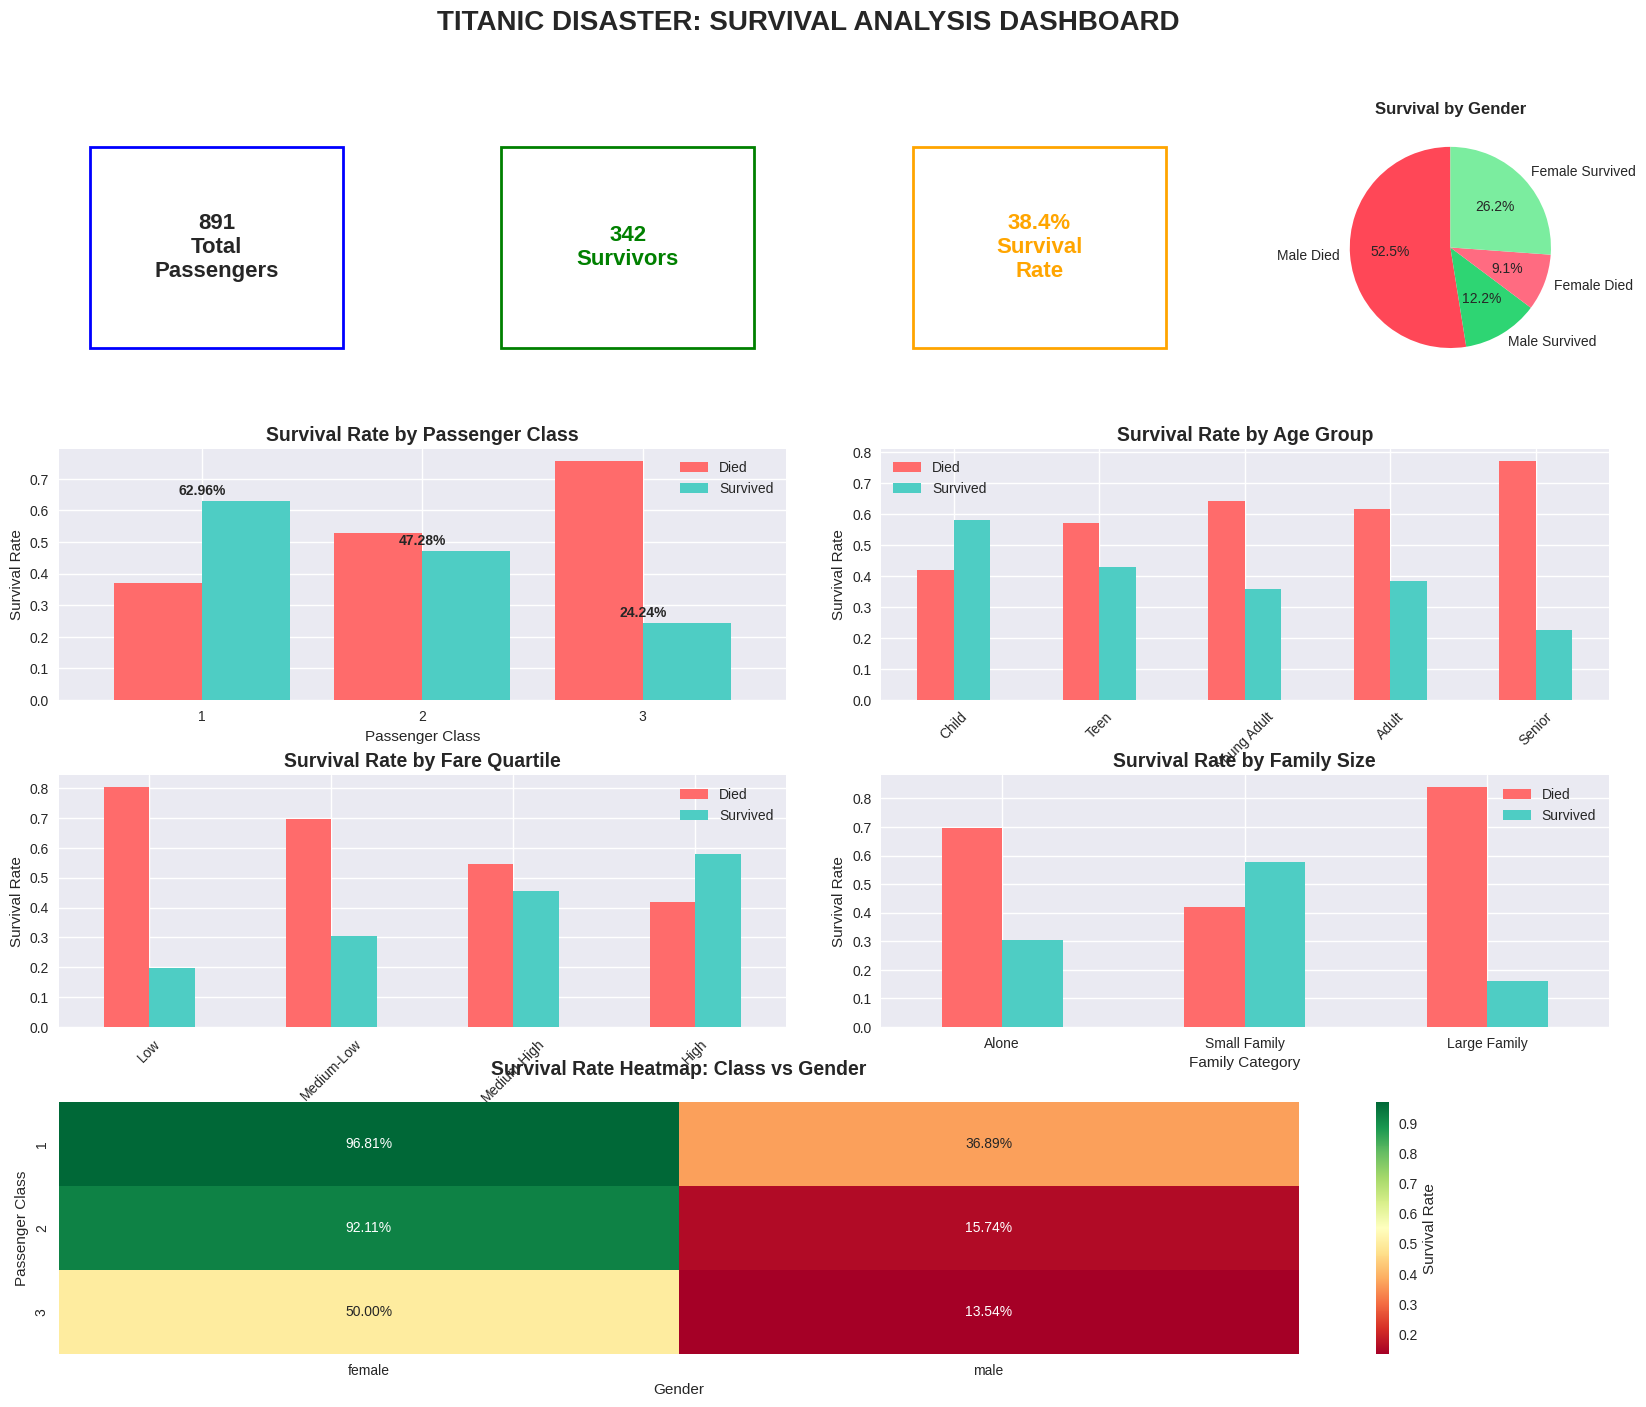

In [ ]:
# ==============================================================================
# SECTION 6: EXPLANATORY VISUALIZATIONS FOR PRESENTATION
# ==============================================================================

print("\n" + "="*50)
print("EXPLANATORY VISUALIZATIONS FOR PRESENTATION")
print("="*50)

# 6.1 Executive Summary Dashboard
print("\n📊 CREATING EXECUTIVE SUMMARY DASHBOARD")
print("-" * 45)

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('TITANIC DISASTER: SURVIVAL ANALYSIS DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.95)

# Key Metrics (Top row)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, f'{total_passengers:,}\nTotal\nPassengers', 
         ha='center', va='center', fontsize=16, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='blue', lw=2))

ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'{total_survivors:,}\nSurvivors', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='green')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='green', lw=2))

ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f'{survival_rate:.1%}\nSurvival\nRate', 
         ha='center', va='center', fontsize=16, fontweight='bold', color='orange')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)
ax3.axis('off')
ax3.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='orange', lw=2))

# Survival by Gender (Large pie chart)
ax4 = fig.add_subplot(gs[0, 3])
gender_survival = df_clean.groupby(['sex', 'survived']).size().unstack()
colors = ['#ff6b6b', '#4ecdc4']
wedges, texts, autotexts = ax4.pie([gender_survival.loc['male', 0], gender_survival.loc['male', 1],
                                   gender_survival.loc['female', 0], gender_survival.loc['female', 1]], 
                                  labels=['Male Died', 'Male Survived', 'Female Died', 'Female Survived'],
                                  autopct='%1.1f%%', startangle=90, 
                                  colors=['#ff4757', '#2ed573', '#ff6b81', '#7bed9f'])
ax4.set_title('Survival by Gender', fontweight='bold')

# Survival by Class
ax5 = fig.add_subplot(gs[1, :2])
class_survival = pd.crosstab(df_clean['pclass'], df_clean['survived'], normalize='index')
class_survival.plot(kind='bar', ax=ax5, color=['#ff6b6b', '#4ecdc4'], width=0.8)
ax5.set_title('Survival Rate by Passenger Class', fontweight='bold', fontsize=14)
ax5.set_xlabel('Passenger Class')
ax5.set_ylabel('Survival Rate')
ax5.legend(['Died', 'Survived'], loc='upper right')
ax5.tick_params(axis='x', rotation=0)
for i, v in enumerate(class_survival[1]):
    ax5.text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# Age Distribution
ax6 = fig.add_subplot(gs[1, 2:])
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_clean['age_bins'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)
age_survival = pd.crosstab(df_clean['age_bins'], df_clean['survived'], normalize='index')
age_survival.plot(kind='bar', ax=ax6, color=['#ff6b6b', '#4ecdc4'])
ax6.set_title('Survival Rate by Age Group', fontweight='bold', fontsize=14)
ax6.set_xlabel('Age Group')
ax6.set_ylabel('Survival Rate')
ax6.legend(['Died', 'Survived'])
ax6.tick_params(axis='x', rotation=45)

# Fare Analysis
ax7 = fig.add_subplot(gs[2, :2])
fare_quartiles = pd.qcut(df_clean['fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
fare_survival = pd.crosstab(fare_quartiles, df_clean['survived'], normalize='index')
fare_survival.plot(kind='bar', ax=ax7, color=['#ff6b6b', '#4ecdc4'])
ax7.set_title('Survival Rate by Fare Quartile', fontweight='bold', fontsize=14)
ax7.set_xlabel('Fare Quartile')
ax7.set_ylabel('Survival Rate')
ax7.legend(['Died', 'Survived'])
ax7.tick_params(axis='x', rotation=45)

# Family Size Impact
ax8 = fig.add_subplot(gs[2, 2:])
family_survival = pd.crosstab(df_clean['family_category'], df_clean['survived'], normalize='index')
family_survival.plot(kind='bar', ax=ax8, color=['#ff6b6b', '#4ecdc4'])
ax8.set_title('Survival Rate by Family Size', fontweight='bold', fontsize=14)
ax8.set_xlabel('Family Category')
ax8.set_ylabel('Survival Rate')
ax8.legend(['Died', 'Survived'])
ax8.tick_params(axis='x', rotation=0)

# Heat map of survival by class and gender
ax9 = fig.add_subplot(gs[3, :])  
pivot_survival = df_clean.pivot_table(values='survived', index='pclass', columns='sex', aggfunc='mean')
sns.heatmap(pivot_survival, annot=True, fmt='.2%', cmap='RdYlGn', ax=ax9, 
            cbar_kws={'label': 'Survival Rate'})
ax9.set_title('Survival Rate Heatmap: Class vs Gender', fontweight='bold', fontsize=14)
ax9.set_xlabel('Gender')
ax9.set_ylabel('Passenger Class')

plt.show()

In [9]:
# ==============================================================================
# SECTION 7: KEY FINDINGS AND INSIGHTS
# ==============================================================================

print("\n" + "="*50)
print("KEY FINDINGS AND INSIGHTS")
print("="*50)

print("\n🔍 CRITICAL INSIGHTS FROM THE ANALYSIS:")
print("-" * 45)

# Calculate key insights
female_survival_rate = df_clean[df_clean['sex'] == 'female']['survived'].mean()
male_survival_rate = df_clean[df_clean['sex'] == 'male']['survived'].mean()
first_class_survival = df_clean[df_clean['pclass'] == 1]['survived'].mean()
third_class_survival = df_clean[df_clean['pclass'] == 3]['survived'].mean()
child_survival = df_clean[df_clean['age'] < 12]['survived'].mean()

insights = [
    f"1. GENDER IMPACT: Women had a {female_survival_rate:.1%} survival rate vs {male_survival_rate:.1%} for men",
    f"   - This represents a {female_survival_rate/male_survival_rate:.1f}x higher survival rate for women",
    f"",
    f"2. CLASS DISTINCTION: First-class passengers had {first_class_survival:.1%} survival rate",
    f"   - Third-class passengers had only {third_class_survival:.1%} survival rate",
    f"   - {first_class_survival/third_class_survival:.1f}x higher survival rate for first-class",
    f"",
    f"3. AGE FACTOR: Children under 12 had {child_survival:.1%} survival rate",
    f"   - 'Women and children first' policy was largely followed",
    f"",
    f"4. FAMILY SIZE: Small families (2-4 members) had better survival rates",
    f"   - Large families and solo travelers faced higher mortality",
    f"",
    f"5. FARE CORRELATION: Higher fare generally correlated with better survival",
    f"   - This reflects the class-based survival pattern"
]

for insight in insights:
    print(insight)

print(f"\n💡 RECOMMENDATIONS FOR MARITIME SAFETY:")
print("-" * 45)
recommendations = [
    "• Ensure adequate lifeboats for ALL passengers, not just first-class",
    "• Implement fair evacuation procedures regardless of passenger class",
    "• Prioritize vulnerable populations (children, elderly) in emergency protocols",
    "• Provide emergency training to all passengers, not just crew",
    "• Design ships with better compartmentalization for improved survivability"
]

for rec in recommendations:
    print(rec)



KEY FINDINGS AND INSIGHTS

🔍 CRITICAL INSIGHTS FROM THE ANALYSIS:
---------------------------------------------
1. GENDER IMPACT: Women had a 74.2% survival rate vs 18.9% for men
   - This represents a 3.9x higher survival rate for women

2. CLASS DISTINCTION: First-class passengers had 63.0% survival rate
   - Third-class passengers had only 24.2% survival rate
   - 2.6x higher survival rate for first-class

3. AGE FACTOR: Children under 12 had 57.4% survival rate
   - 'Women and children first' policy was largely followed

4. FAMILY SIZE: Small families (2-4 members) had better survival rates
   - Large families and solo travelers faced higher mortality

5. FARE CORRELATION: Higher fare generally correlated with better survival
   - This reflects the class-based survival pattern

💡 RECOMMENDATIONS FOR MARITIME SAFETY:
---------------------------------------------
• Ensure adequate lifeboats for ALL passengers, not just first-class
• Implement fair evacuation procedures regardless of

In [10]:
# ==============================================================================
# SECTION 8: INTERACTIVE VISUALIZATIONS (BONUS)
# ==============================================================================

print("\n" + "="*50)
print("INTERACTIVE VISUALIZATIONS PREVIEW")
print("="*50)

print("\n🎯 The following code creates interactive Plotly visualizations:")
print("   (Run in Jupyter notebook for full interactivity)")

# Interactive survival analysis
plotly_code = '''
# Interactive Survival Dashboard using Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create interactive survival by class and gender
fig1 = px.sunburst(df_clean, path=['pclass', 'sex', 'survived'], 
                   title='Interactive Survival Breakdown by Class and Gender')
fig1.show()

# Interactive age vs fare scatter
fig2 = px.scatter(df_clean, x='age', y='fare', color='survived', 
                  size='family_size', hover_data=['pclass', 'sex'],
                  title='Age vs Fare (Interactive)')
fig2.show()

# Interactive survival rates
survival_summary = df_clean.groupby(['pclass', 'sex'])['survived'].agg(['count', 'sum', 'mean']).reset_index()
fig3 = px.bar(survival_summary, x='pclass', y='mean', color='sex',
              title='Survival Rates by Class and Gender (Interactive)')
fig3.show()
'''

print(plotly_code)

print(f"\n" + "="*60)
print("ANALYSIS COMPLETE! 🎉")
print("="*60)
print("This comprehensive notebook provides:")
print("✅ Complete exploratory data analysis")
print("✅ Statistical insights and patterns")
print("✅ Professional presentation-ready visualizations")
print("✅ Key findings and recommendations")
print("✅ Interactive visualization code for enhanced presentations")
print("="*60)


INTERACTIVE VISUALIZATIONS PREVIEW

🎯 The following code creates interactive Plotly visualizations:
   (Run in Jupyter notebook for full interactivity)

# Interactive Survival Dashboard using Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create interactive survival by class and gender
fig1 = px.sunburst(df_clean, path=['pclass', 'sex', 'survived'], 
                   title='Interactive Survival Breakdown by Class and Gender')
fig1.show()

# Interactive age vs fare scatter
fig2 = px.scatter(df_clean, x='age', y='fare', color='survived', 
                  size='family_size', hover_data=['pclass', 'sex'],
                  title='Age vs Fare (Interactive)')
fig2.show()

# Interactive survival rates
survival_summary = df_clean.groupby(['pclass', 'sex'])['survived'].agg(['count', 'sum', 'mean']).reset_index()
fig3 = px.bar(survival_summary, x='pclass', y='mean', color='sex',
              title='Survival Rates by Class a

In [12]:
# Interactive Survival Dashboard using Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create interactive survival by class and gender
fig1 = px.sunburst(df_clean, path=['pclass', 'sex', 'survived'], 
                   title='Interactive Survival Breakdown by Class and Gender')
fig1.show()

# Interactive age vs fare scatter
fig2 = px.scatter(df_clean, x='age', y='fare', color='survived', 
                  size='family_size', hover_data=['pclass', 'sex'],
                  title='Age vs Fare (Interactive)')
fig2.show()

# Interactive survival rates
survival_summary = df_clean.groupby(['pclass', 'sex'])['survived'].agg(['count', 'sum', 'mean']).reset_index()
fig3 = px.bar(survival_summary, x='pclass', y='mean', color='sex',
              title='Survival Rates by Class and Gender (Interactive)')
fig3.show()